# Principle component analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generate fake data for N students in 2 exams

In [2]:
N = 50
exam1 = np.random.normal(35, 20, N)
exam1 = np.abs(exam1-np.max(exam1) + 95)
exam2 = 10.0*np.sqrt(exam1) + np.random.normal(0, 20, N)
exam2 = np.abs(exam2-np.max(exam2) + 95)

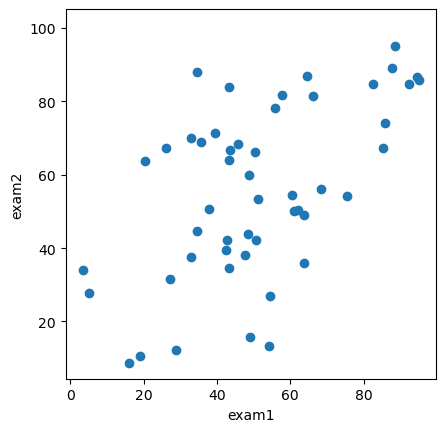

In [3]:
plt.scatter(exam1, exam2)
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.axis('square')
plt.show()

## PCA to find the first principle component

In [4]:
# data matrix
A = np.stack((exam1, exam2))

# average
mu = np.sum(A, axis=1).reshape((2,1))/N

# shifted data matrix
Y = A - mu*np.ones((1,N))

# covariance matrix
C = np.dot(Y,Y.T)/N

In [5]:
# SVD for Y^T
U, S, Vh = np.linalg.svd(Y.T, full_matrices=False)

# To check if the SVD is working fine, uncommand the following
# np.allclose(np.dot(U * S, Vh), Y)

# First principle axis
v1 = Vh[0:1,:]

In [6]:
## Dimensionality reduction and visualization

In [7]:
# projected data in 1D
y_new = np.dot(v1, Y)

# projected data in the original space
Y_new = mu + np.dot(v1.T, y_new)

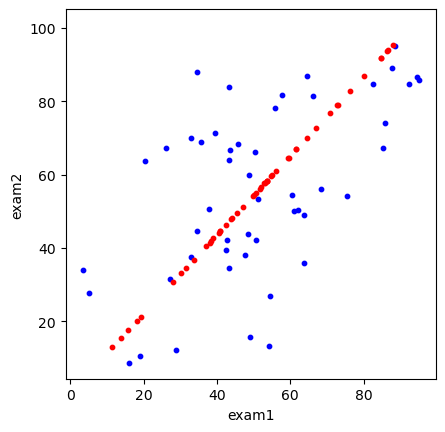

In [8]:
plt.scatter(exam1, exam2, s=10.0, c='blue')
plt.scatter(Y_new[0,:], Y_new[1,:], s=10.0, c='red')
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.axis('square')
plt.show()

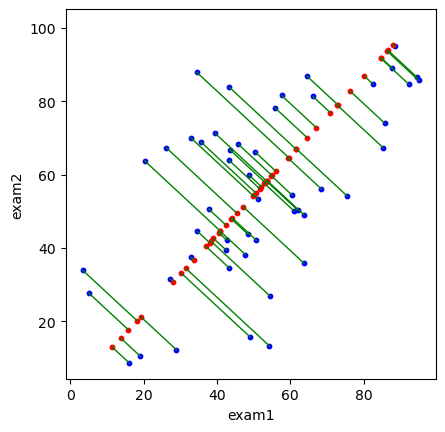

In [9]:
Line_x = np.stack((exam1, Y_new[0,:]))
Line_y = np.stack((exam2, Y_new[1,:]))
plt.plot(Line_x, Line_y, c='green', linewidth=1)
plt.scatter(exam1, exam2, s=10.0, c='blue')
plt.scatter(Y_new[0,:], Y_new[1,:], s=10.0, c='red')
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.axis('square')
plt.show()